<a href="https://colab.research.google.com/github/Bossism/DailyStudy/blob/master/Multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

加载路透社数据集

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data,test_labels) = reuters.load_data(
    num_words = 10000
)

In [5]:
print(len(train_data))
print(len(test_data))
print(train_data[0])

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
# 索引减去了3是因为0 1 2分别为 "padding"(填充) "start of sequence"(序列开始) "unknown"(未知词)
print(decoded_newswire)
print(train_labels[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


数据向量化

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train)
print(train_labels)
print(x_test)
print(test_labels)

构建网络

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

验证我的小方法，在训练数据集中留出1000个样本作为验证集



In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

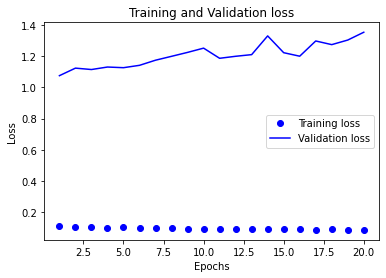

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

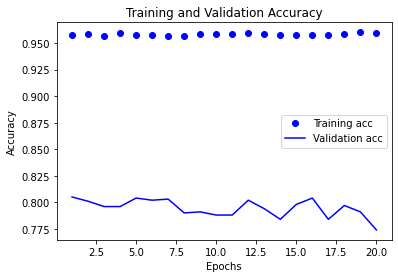

In [12]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 2s 69ms/step - loss: 3.1202 - accuracy: 0.3773 - val_loss: 1.7666 - val_accuracy: 0.6410
Epoch 2/9
16/16 [==============================] - 1s 57ms/step - loss: 1.5401 - accuracy: 0.6880 - val_loss: 1.3164 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 1s 58ms/step - loss: 1.0810 - accuracy: 0.7686 - val_loss: 1.1618 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 1s 58ms/step - loss: 0.8478 - accuracy: 0.8228 - val_loss: 1.0614 - val_accuracy: 0.7690
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6754 - accuracy: 0.8605 - val_loss: 0.9861 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 1s 51ms/step - loss: 0.5446 - accuracy: 0.8863 - val_loss: 0.9609 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 1s 55ms/step - loss: 0.4492 - accuracy: 0.9069 - val_loss: 0.9051 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

在新数据上生成预测结果

In [25]:
predictions = model.predict(x_test)
# print(predictions[0].shape) # predictions中的每个元素都是长度为46的向量
# print(np.sum(predictions[0])) # 这个向量的所有元素总和为1
print(np.argmax(predictions[100])) # 最大的元素为预测类别，即概率最大的类别

# print(len(predictions))
for i in range(len(predictions)):
  print(np.argmax(predictions[i]))

41
2246
